## 综述：
__在这个文档中，主要学习怎么使用scikit-learn库来做简单线性回归。数据集是与燃油消耗和汽车二氧化碳排放量相关，然后把数据集分成训练集和测试集，用训练集在创建模型，用测试集来评估模型的好坏，最后使用模型来预测未知值。

首先加载需要的packages:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

从IBM Object Storage中下载数据：

In [5]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

In [6]:
#首先看一下数据
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 做一个数据探索

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


选择其中某一些特征

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


用直方图看一下这几列数据：

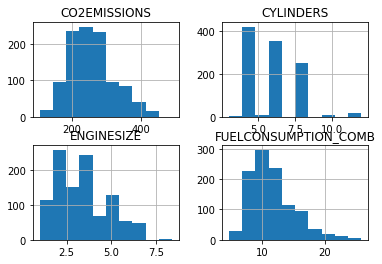

In [9]:
viz=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

分别用这三个变量与二氧化碳排放量做一个散点图，看一下趋势：

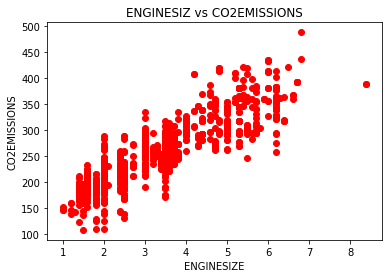

In [11]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.title('ENGINESIZ vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

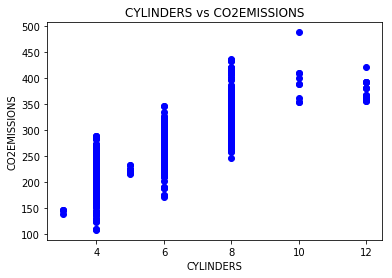

In [12]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.title('CYLINDERS vs CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

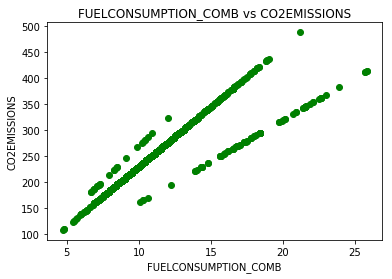

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='green')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

## 创建训练集和测试集

In [19]:
msk=np.random.rand(len(cdf))<0.8
train=cdf[msk]
test=cdf[~msk]

## 简单回归模型

In [ ]:
首先用ENGINESIZE与CO2EMISSIONS回归

In [20]:
from sklearn import linear_model
regr=linear_model.LinearRegression()  #调用线性回归模型
train_x=np.asanyarray(train[['ENGINESIZE']])          #训练集自变量
train_y=np.asanyarray(train[['CO2EMISSIONS']])        #训练集因变量
regr.fit(train_x,train_y)                             #对数据应用回归模型
# The coefficients
print ('Coefficients: ', regr.coef_)    #系数
print ('Intercept: ',regr.intercept_)   #截距

Coefficients:  [[38.98128042]]
Intercept:  [125.74914962]


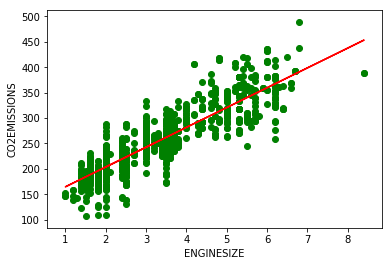

In [22]:
pre_y=regr.coef_[0][0]*train_x+regr.intercept_[0]                         #预测值
plt.plot(train_x,pre_y,'-r')                                       #画回归曲线
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')              #画数据的散点图
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

评估模型：
    比较真实值与预测值来计算回归模型的准确率。
    - 平均绝对误差：np.mean(np.absolute(pre_y-test_y))
    - 均方误差（MSE）：np.mean((pre_y-test_y)**2)
    - r方：不是描述误差的，但是也是可以看出模型的准确率，值越高说明拟合程度越高

In [24]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])   #测试集自变量
test_y=np.asanyarray(test[['CO2EMISSIONS']])  #测试集真实值
test_pre_y=regr.predict(test_x)              #测试集预测值
print('平均绝对误差：%.2f'% np.mean(np.absolute(test_y-test_pre_y)))
print('均方误差MSE：%.2f'% np.mean((test_y-test_pre_y)**2))
print('R方：%.2f'% r2_score(test_pre_y,test_y))

平均绝对误差：25.19
均方误差MSE：1030.14
R方：0.63
